In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from numba import jit
import community

In [12]:
import warnings; warnings.simplefilter('ignore')

In [2]:
@jit(nopython = True)
def generator(A):
    B = np.zeros((len(A)+2, len(A)+2), np.int_)
    B[1:-1,1:-1] = A
    for i in range(len(B)):
        for j in range(len(B)):
            count = 0
            count += B[i][j]
            if i-1 > 0:
                count += B[i-1][j]
            if i+1 < len(B):
                count += B[i+1][j]
            if j-1 > 0:
                count += B[i][j-1]
            if j+1 < len(B):
                count += B[i][j+1]
            if count == 0:
                B[i][j] = 1
            if count > 4:
                B[i][j] = 1
            if count <= 4 and count > 0:
                B[i][j] = 0
    Bnext = np.zeros_like(B, np.int_)
    Bnext = np.triu(B,1) + B.T - np.diag(np.diag(B))
    for i in range(len(Bnext)):
      for j in range(len(Bnext)):
        if Bnext[i][j] > 1:
          Bnext[i][j] = 1
    return(Bnext)

In [3]:
try:
    from functools import lru_cache
except ImportError:
    from backports.functools_lru_cache import lru_cache

In [4]:
def generator2(A_, number):
  time = 0
  while time < number:
    A_ = generator(A_)
    time += 1
  return A_

[[0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.]]


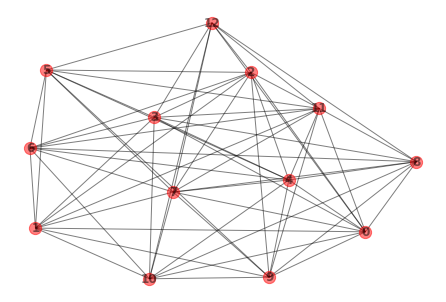

In [6]:
g1 = nx.erdos_renyi_graph(13, 0.8)
A1 = nx.to_numpy_matrix(g1)
print(A1)
nx.draw(g1, node_size=150, alpha=0.5, with_labels=True, font_weight = 'bold')
#plt.savefig('g1_0.png')
plt.show()

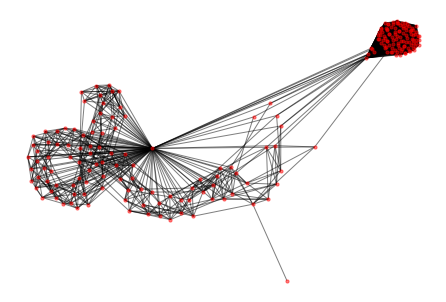

In [13]:
gen_A1 = generator2(A1, 100)
gen_g1 = nx.from_numpy_matrix(gen_A1)
nx.draw(gen_g1, node_size=10, alpha=0.5)
#plt.savefig('g1_100.png')
plt.show()

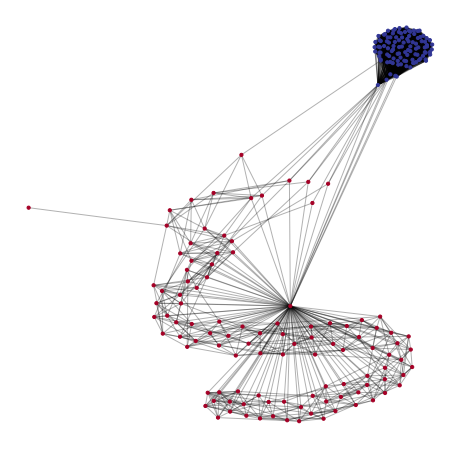

In [15]:
partition = community.best_partition(gen_g1)
pos = nx.spring_layout(gen_g1)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g1, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g1, pos, alpha=0.3)
#plt.savefig('g1_100_community.png')
plt.show(gen_g1)

[[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]]


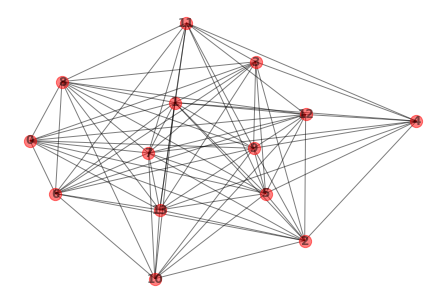

In [31]:
g2 = nx.erdos_renyi_graph(14, 0.8)
A2 = nx.to_numpy_matrix(g2)
print(A2)
nx.draw(g2, node_size=150, alpha=0.5, with_labels=True, font_weight = 'bold')
#plt.savefig('g2_0.png')
plt.show()

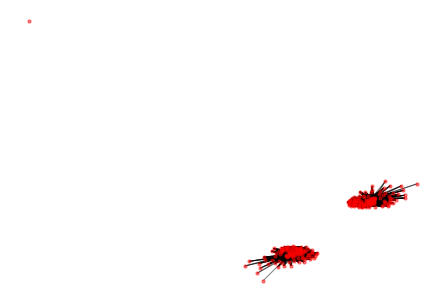

In [32]:
gen_A2 = generator2(A2, 100)
gen_g2 = nx.from_numpy_matrix(gen_A2)
nx.draw(gen_g2, node_size=10, alpha=0.5)
#plt.savefig('g2_100.png')
plt.show()

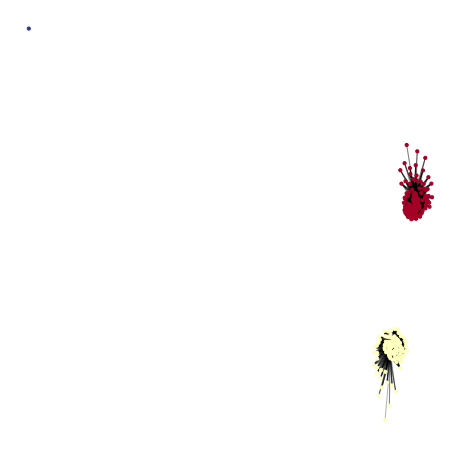

In [33]:
partition = community.best_partition(gen_g2)
pos = nx.spring_layout(gen_g2)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(gen_g2, pos, node_size=10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(gen_g2, pos, alpha=0.3)
#plt.savefig('g2_100_community.png')
plt.show(gen_g2)